In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline

In [2]:
import imp

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBRFClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adamricks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from os import listdir

In [ ]:
files = listdir('./Data') 

In [ ]:
files

In [ ]:
file_paths = []
for i in files[1:]:
    if i[-1] != 'x' and i[-1] != 'e':
        file_paths.append('data/' + str(i))

In [ ]:
def specific_read(csv_path):
    return pd.read_csv(csv_path,low_memory=False, header=1)

In [ ]:
df = pd.concat(map(specific_read, file_paths))

In [ ]:
df.to_csv('LC_Compiled.csv')

In [5]:
df = pd.read_csv('LC_Compiled.csv',low_memory=False)

In [15]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP

In [85]:
imp.reload(LCP)
imp.reload(LCC)

<module 'src.LC_Clean_Assist' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py'>

In [84]:
df = LCC.clean_lc_for_plotting(df)

KeyError: "['Unnamed: 0'] not found in axis"

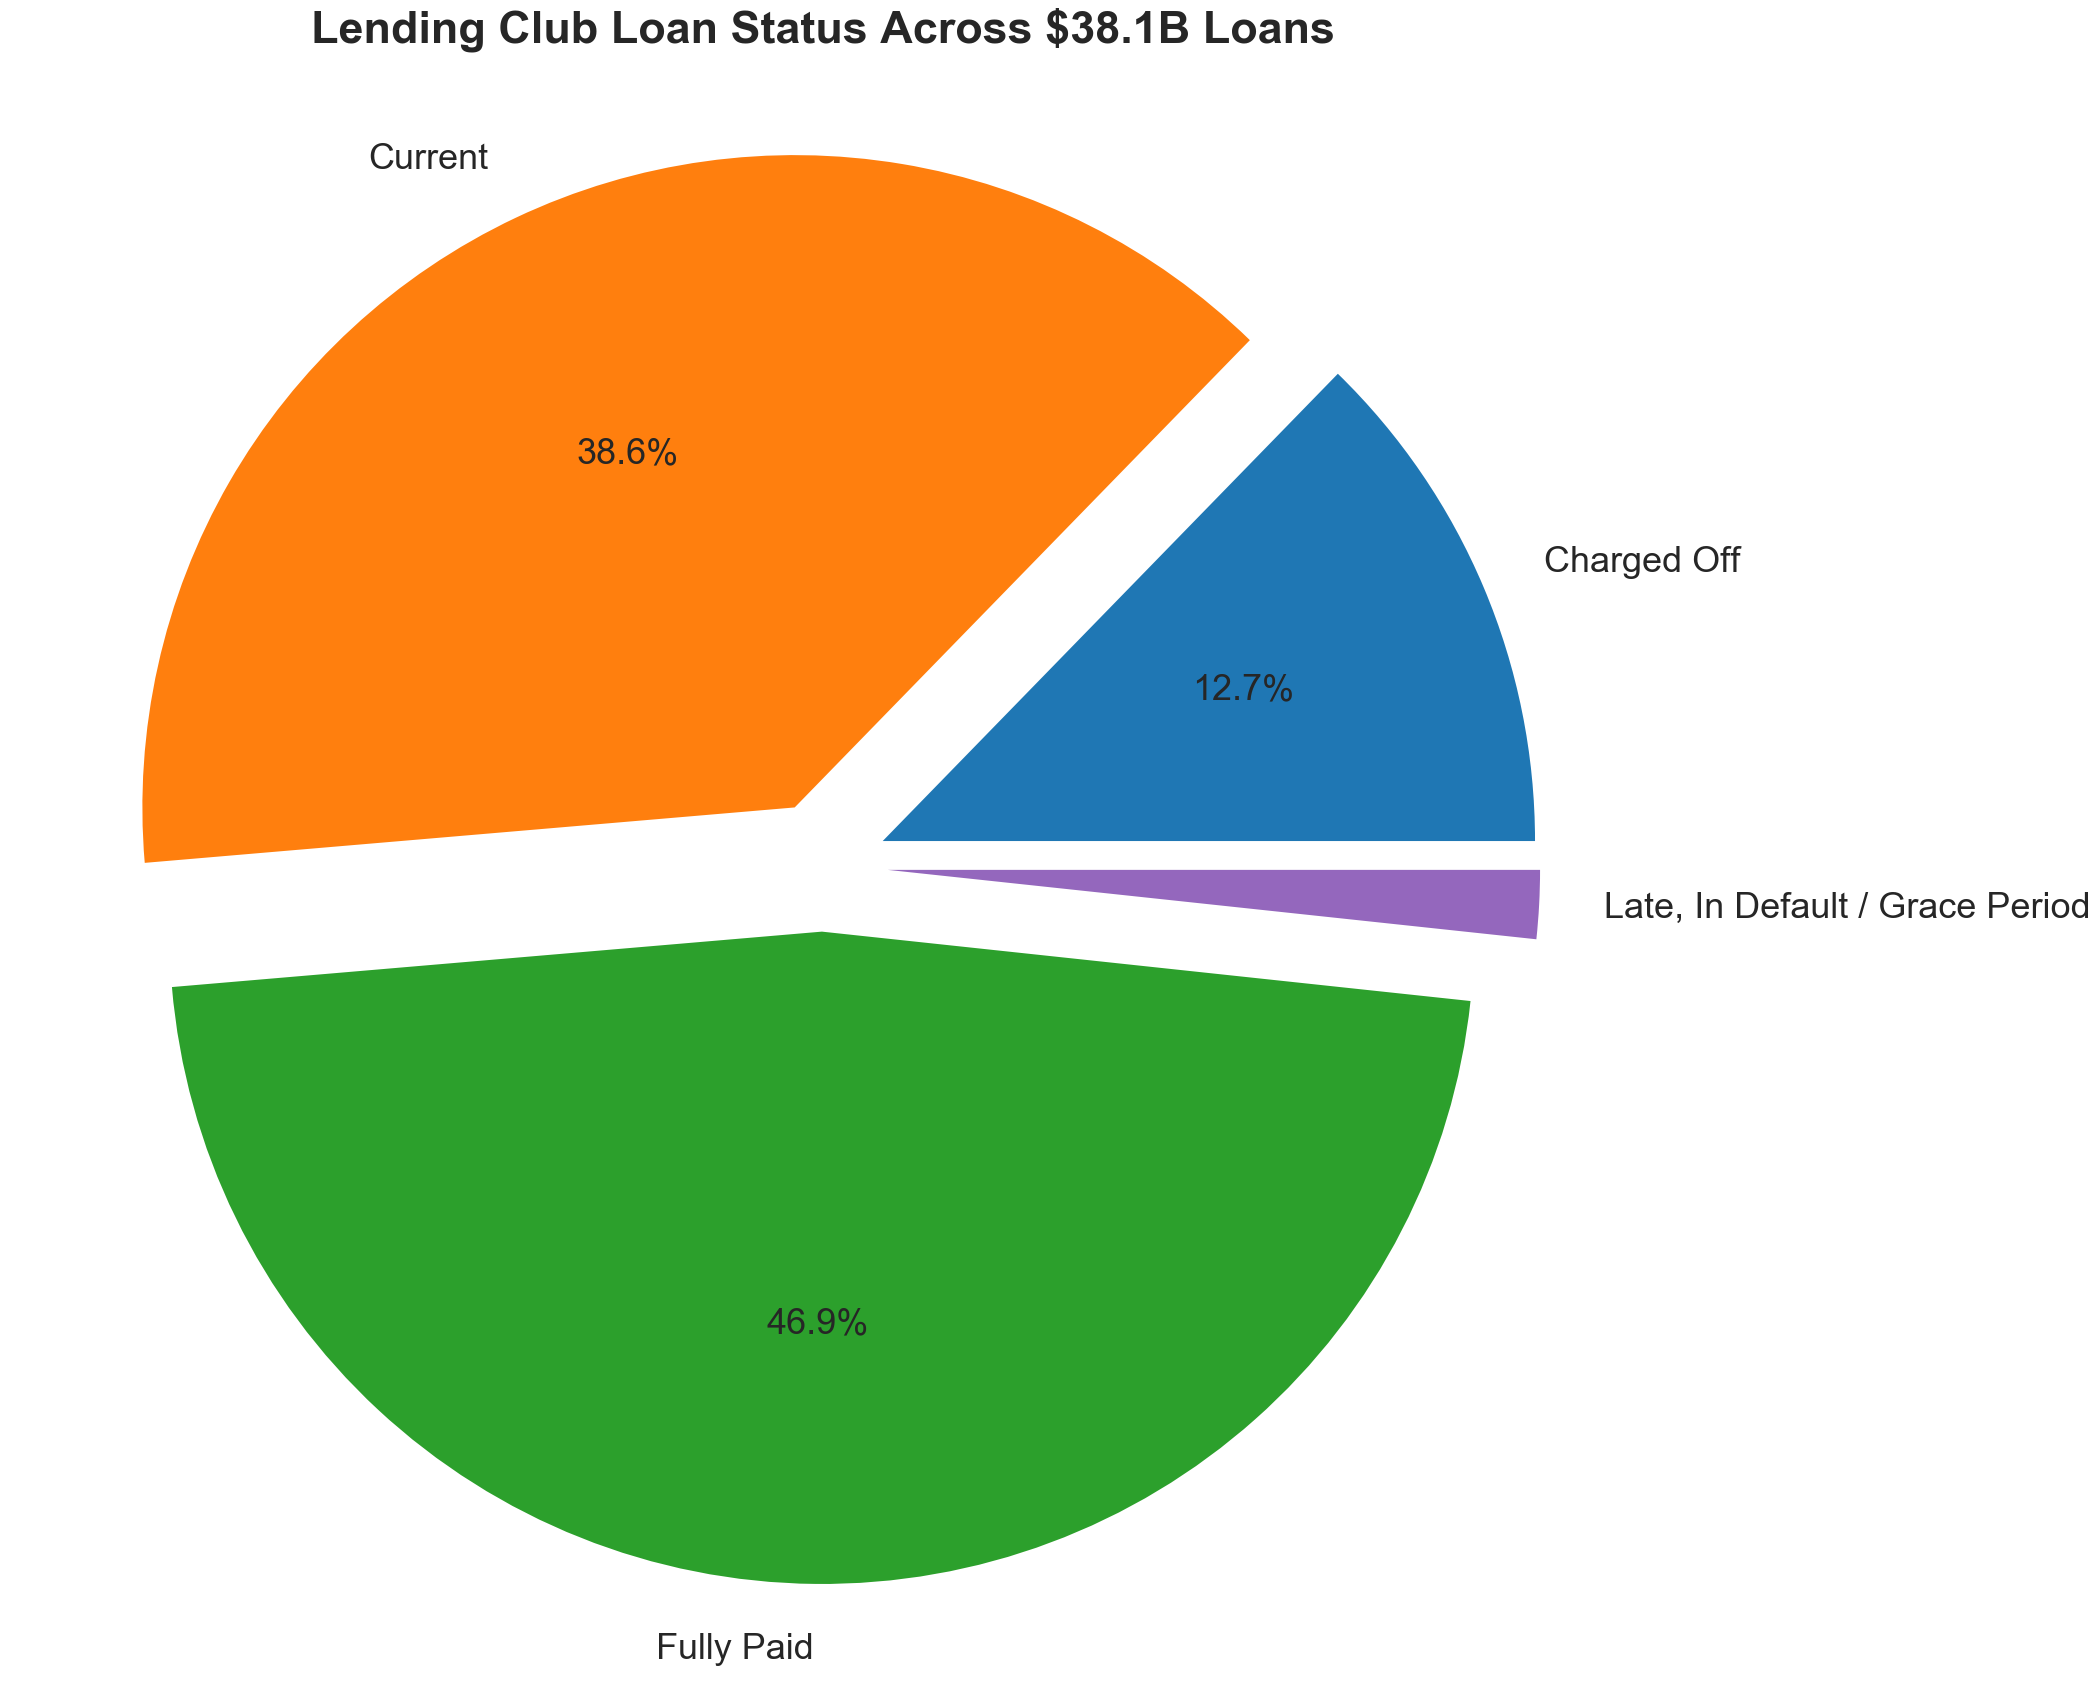

In [86]:
LCP.plot_loan_breakdown_pie(df)

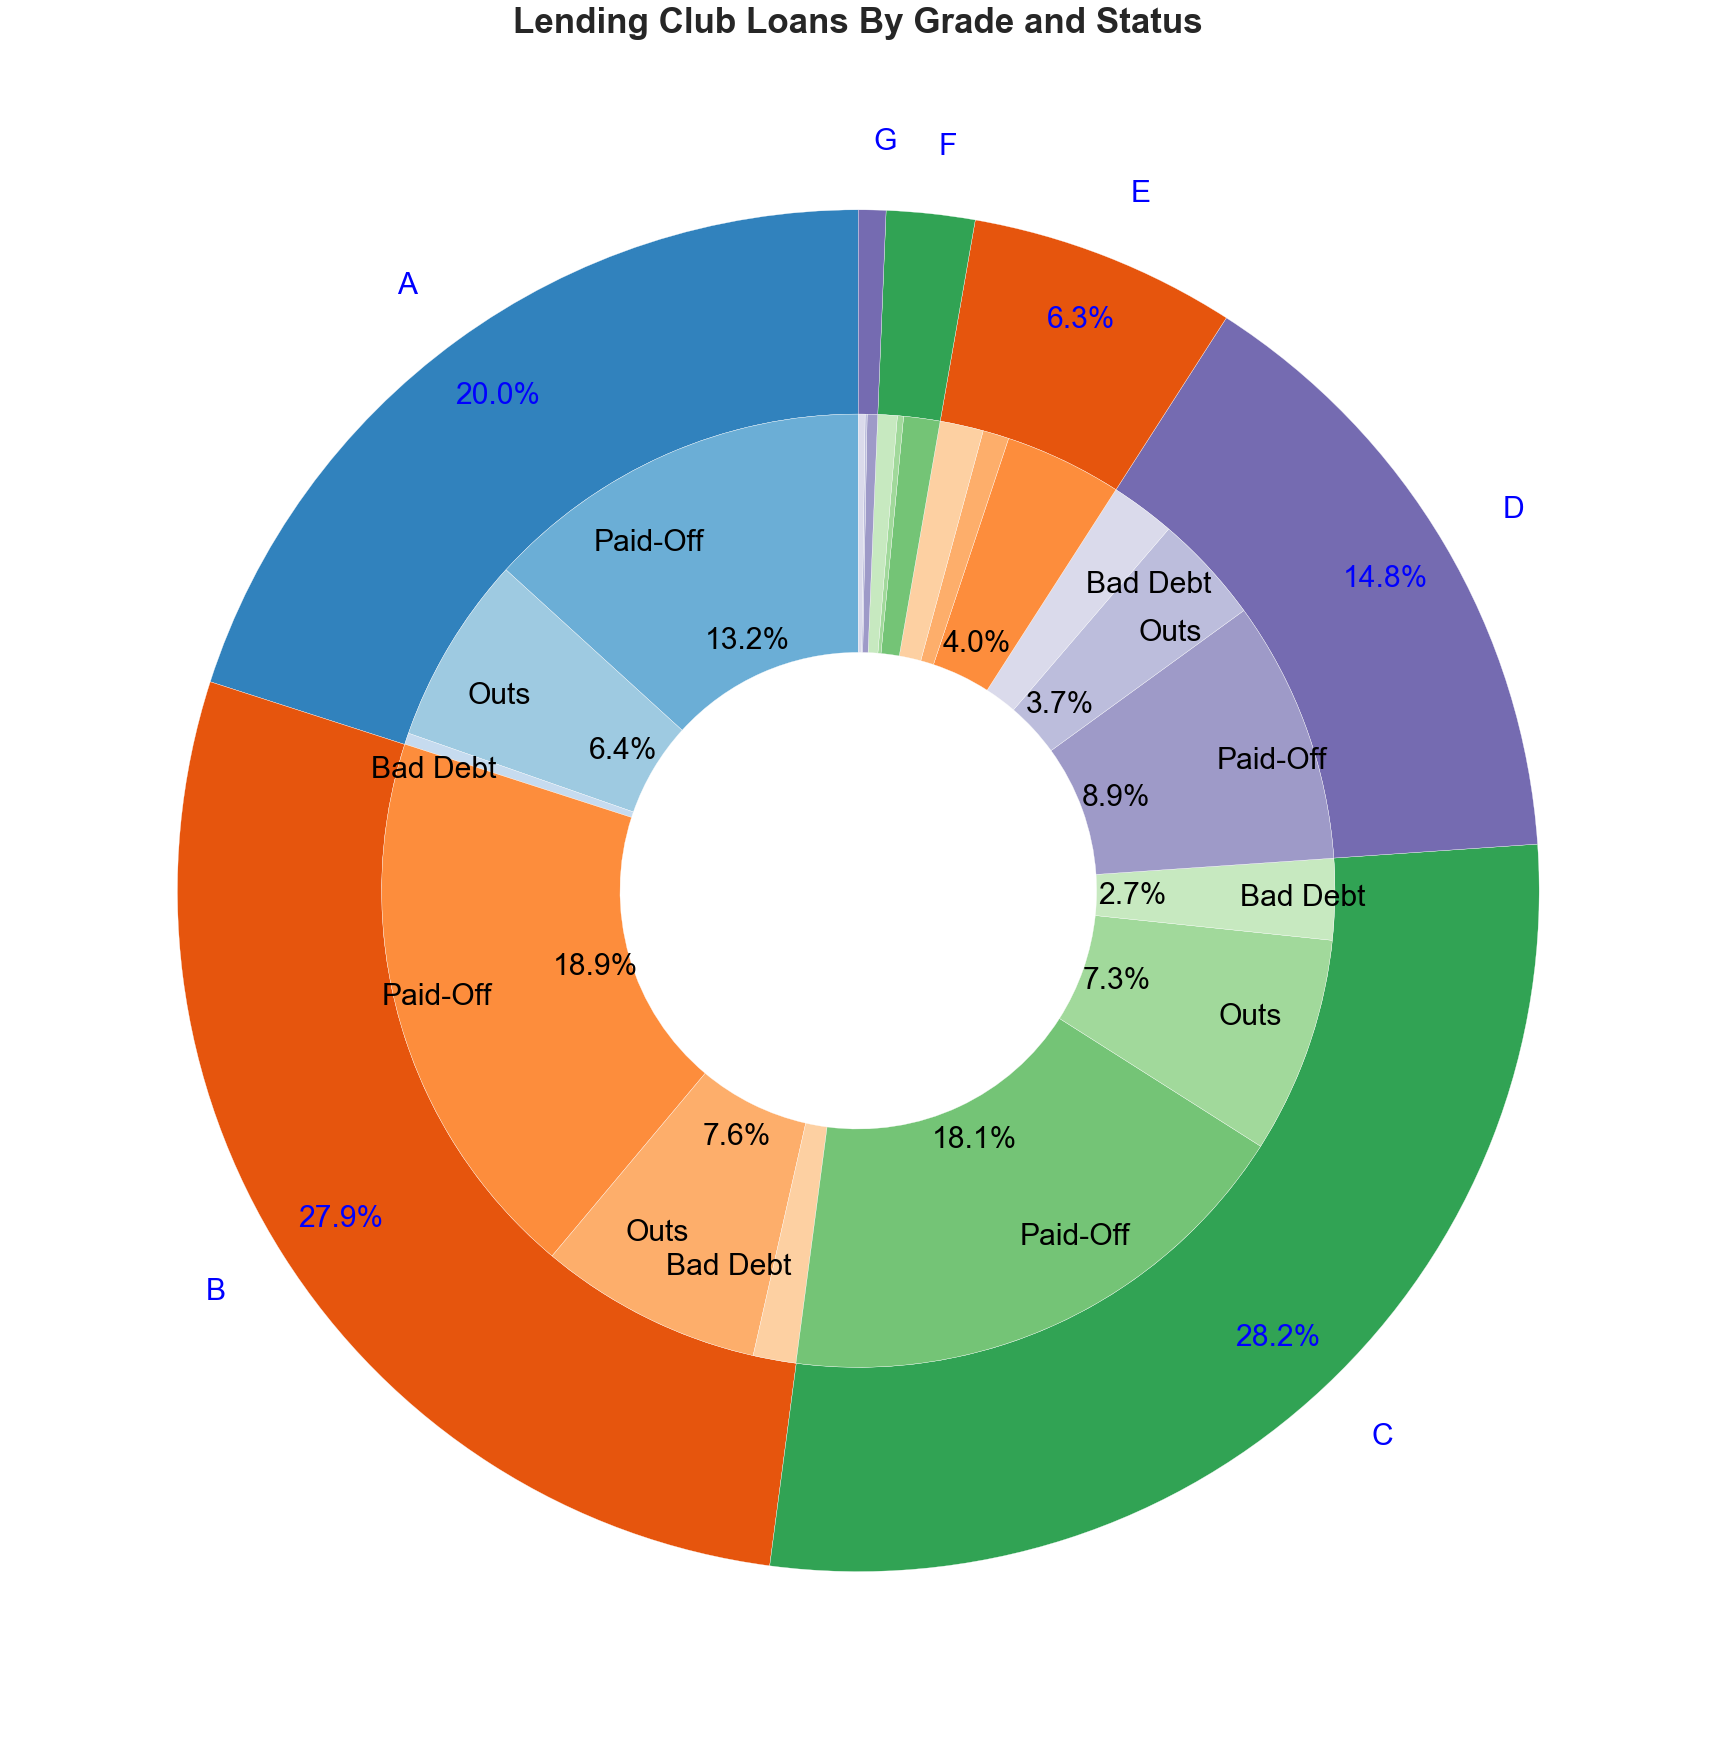

In [87]:
LCP.plot_grade_breakdown_pie(df)

In [13]:
LCP.choro_debt_state(df)

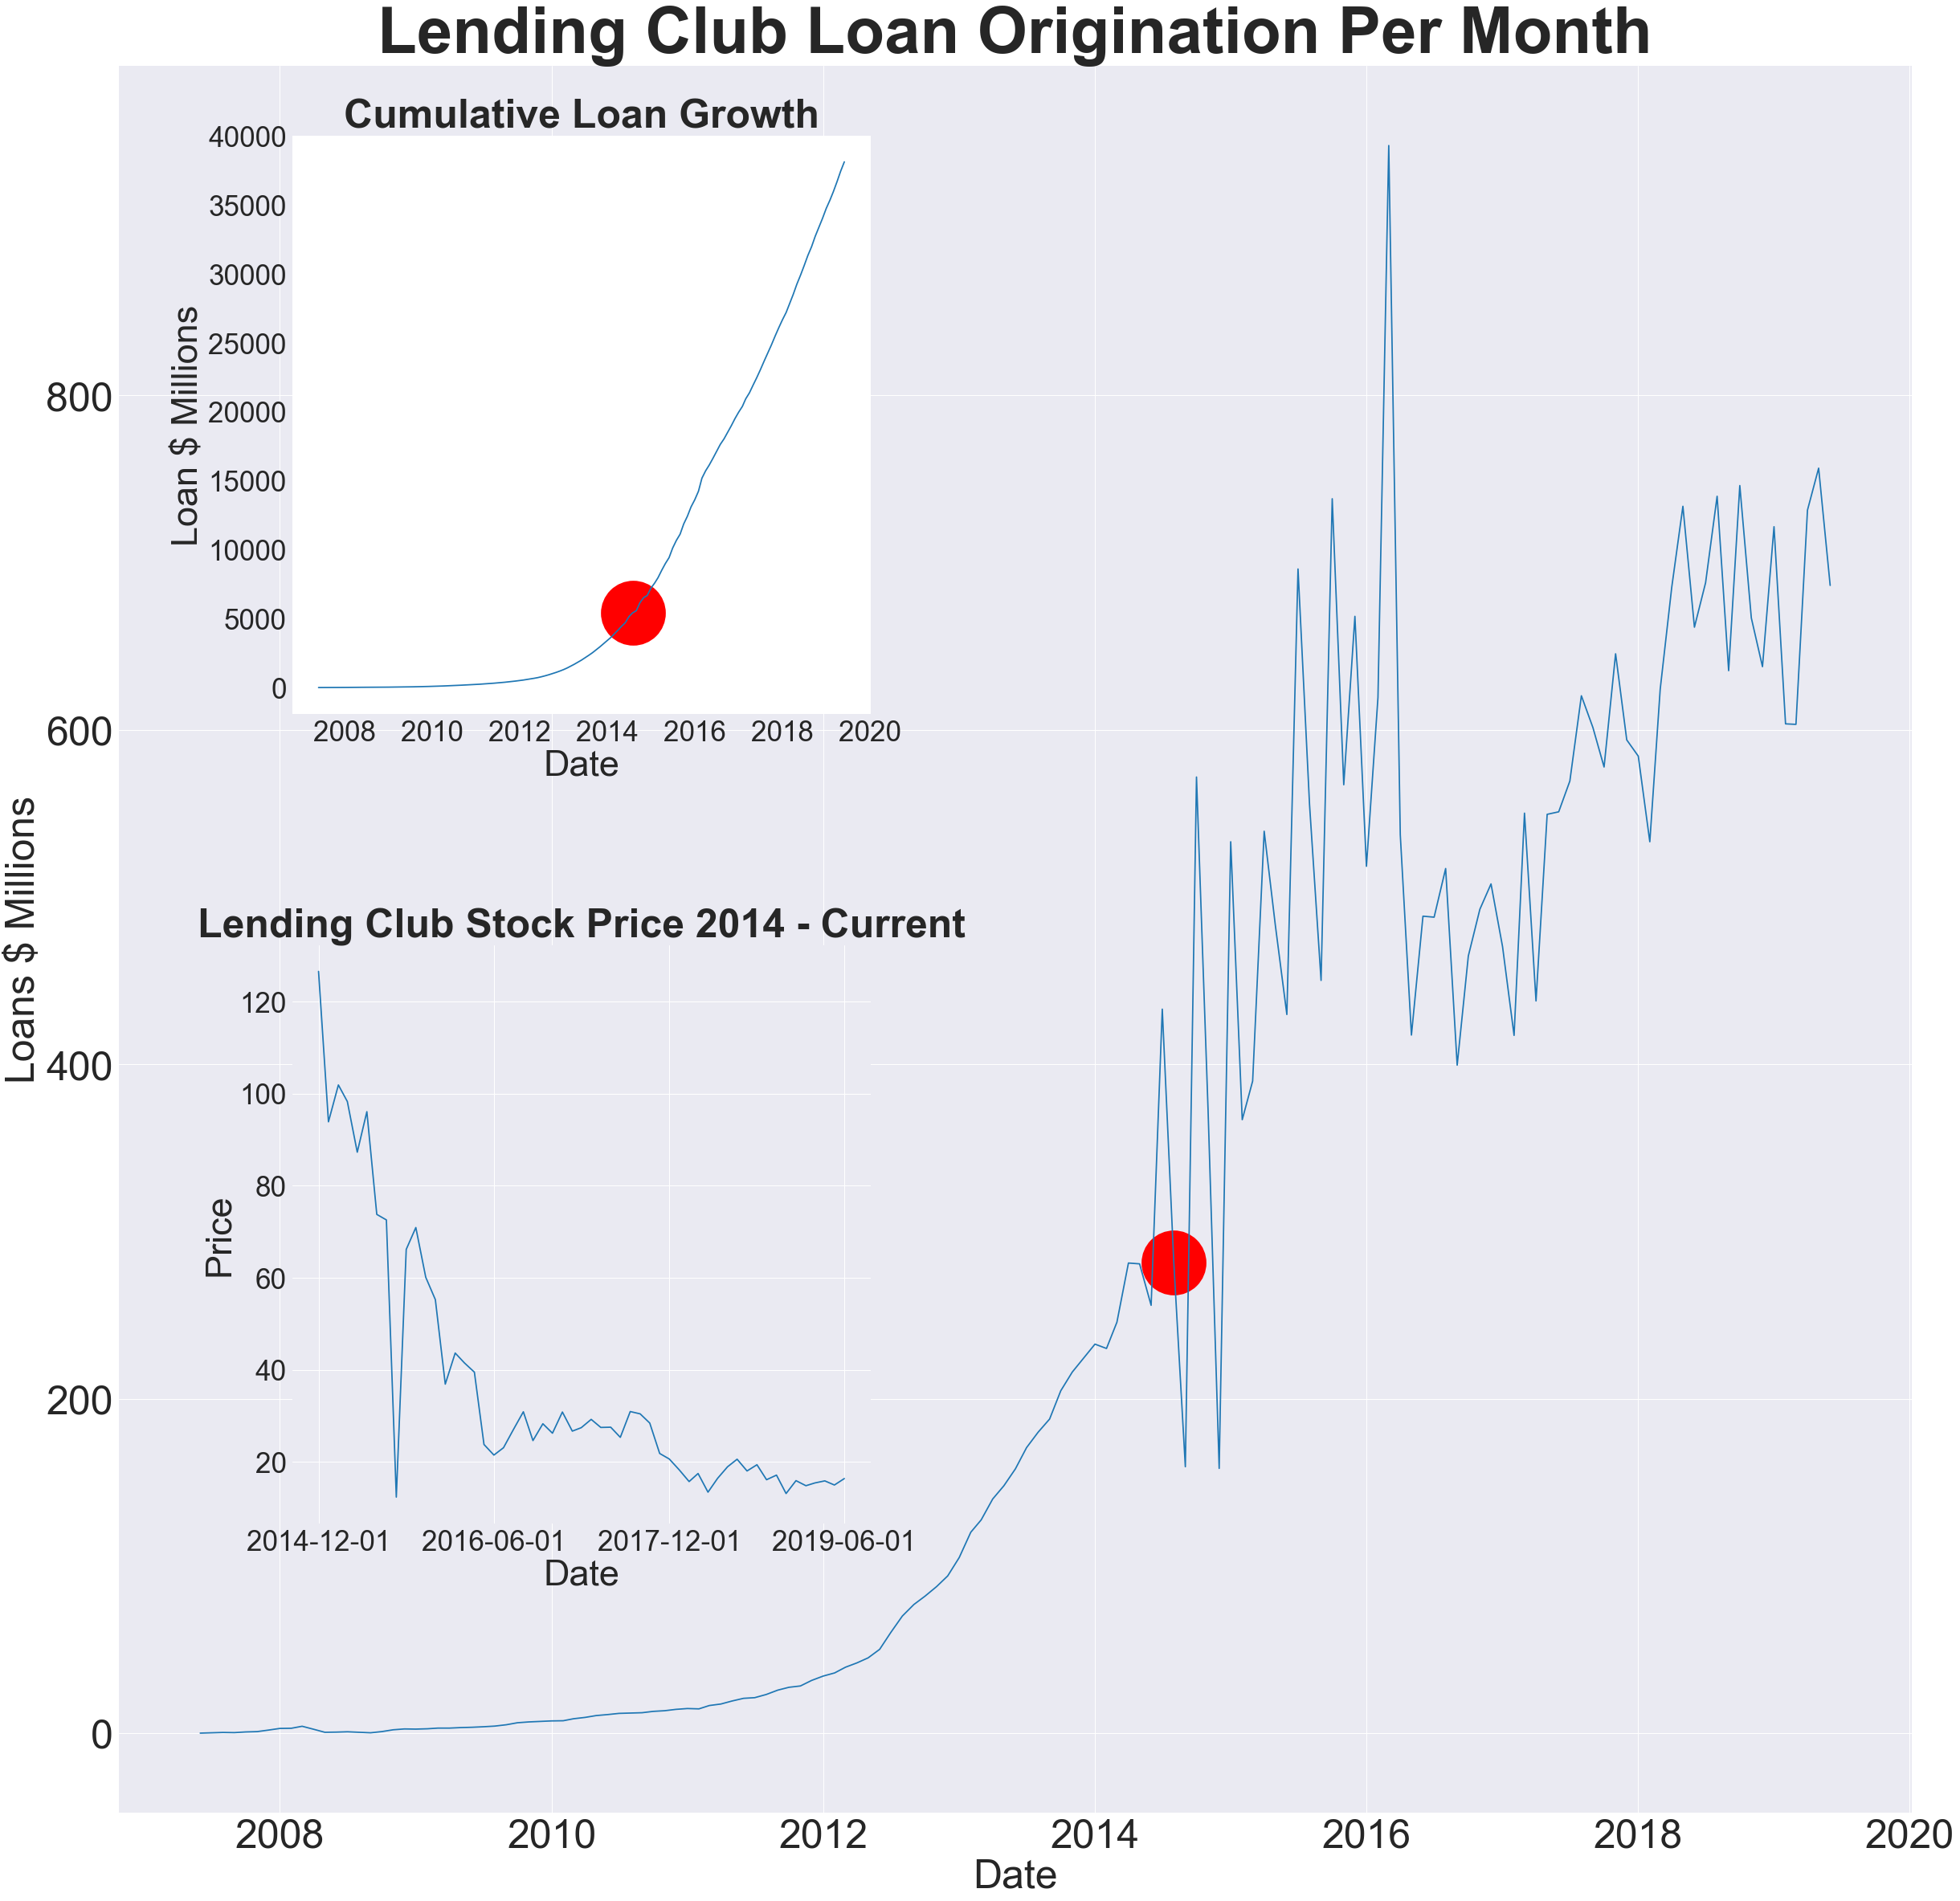

In [12]:
LCP.lc_time_series(df)

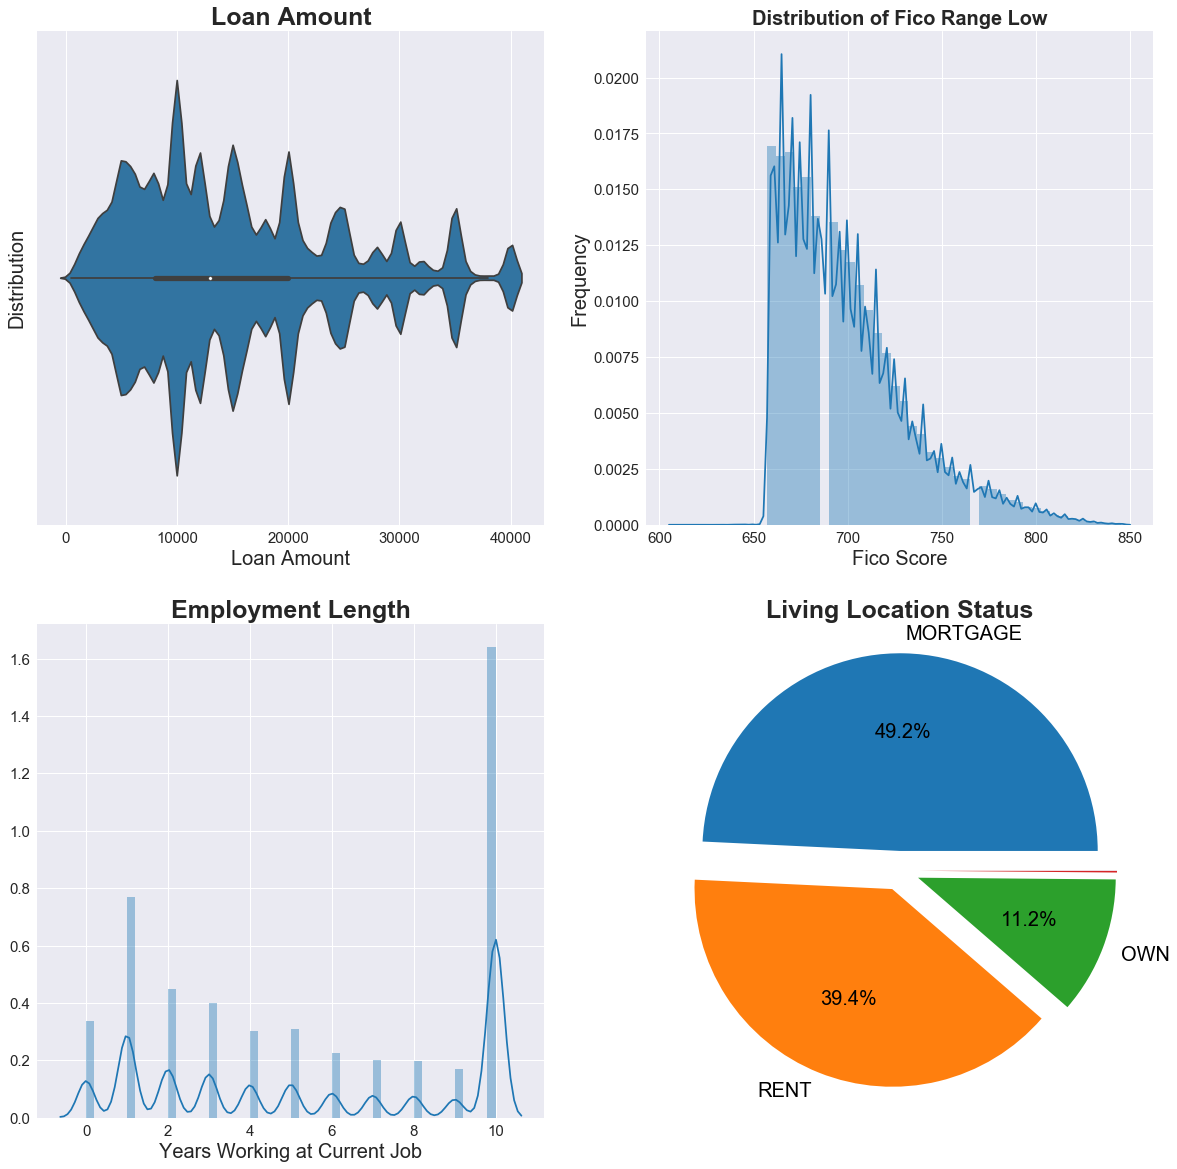

In [39]:
LCP.lc_individual_profile(df)

Create histograms for the following:
-  Loan Amount
-  Emplyoment Length
-  Int Rate
-  FICO Scores

Create Violin Chart for Incomes
<br><br>
Create Pie Chart for housing
<br><br>
Create violin plot of DTI
<br><br>
Create Pie Chart for title of loans

If person did not put title / desc, create one hot label, 
else create bag of words count vectorizer to then create a kmeans algorithm to cluster them

In [49]:
df['title']=df['title'].apply(lambda x: str(x).lower())

In [58]:
cv = CountVectorizer('english')

In [59]:
cv.fit(df[df['title'] != 'nan']['title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='english',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
cv_mat = cv.transform(df[df['title'] != 'nan']['title'])

In [62]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df[df['title'] != 'nan']['title'])

In [65]:
vocab = vectorizer.get_feature_names()

In [70]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,5))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

ValueError: x and y arrays must have at least 2 entries

In [ ]:
nmf = NMF(n_components = 100)
nmf.fit(X.toarray())
W = nmf.transform(X.toarray())
H = nmf.components_

for i in range(50):
    index = np.argsort(H[i,:])
#     print(index[-10:])
    print('most common for concept {}: \n'.format(i), [vocab[idx] for idx in index[-10:]])

In [71]:
df['loan_amnt'].sum()

38118844250.0

In [73]:
df[['issue_d','loan_amnt']]

,issue_d,loan_amnt
0,2014-12-01,10400.0
1,2014-12-01,15000.0
2,2014-12-01,9600.0
3,2014-12-01,12800.0
4,2014-12-01,21425.0
5,2014-12-01,7650.0
6,2014-12-01,23325.0
7,2014-12-01,12975.0
8,2014-12-01,17000.0
9,2014-12-01,2500.0


In [79]:
df[df['issue_d'] > '2019-3-01']['loan_amnt'].sum() 

2174279975.0